In [32]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs 
from sklearn.metrics import accuracy_score

[[ 4.21850347  2.23419161]
 [ 0.90779887  0.45984362]
 [-0.27652528  5.08127768]
 [ 0.08848433  2.32299086]
 [ 3.24329731  1.21460627]
 [ 1.44193252  2.76754364]
 [ 1.0220286   4.11660348]
 [ 3.97820955  2.37817845]
 [ 0.58894326  4.00148458]
 [ 1.25185786  0.20811388]
 [ 0.62835793  4.4601363 ]
 [ 1.68608568  0.65828448]
 [ 1.18454506  5.28042636]
 [ 0.06897171  4.35573272]
 [ 1.78726415  1.70012006]
 [ 4.4384123   1.84214315]
 [ 3.18190344 -0.18226785]
 [ 0.30380963  3.94423417]
 [ 0.73936011  0.43607906]
 [ 1.28535145  1.43691285]
 [ 1.1312175   4.68194985]
 [ 0.66471755  4.35995267]
 [ 1.31570453  2.44067826]
 [-0.18887976  5.20461381]
 [ 2.57854418  0.72611733]
 [ 0.87305123  4.71438583]
 [ 1.3105127   0.07122512]
 [ 0.9867701   6.08965782]
 [ 1.42013331  4.63746165]
 [ 2.3535057   2.22404956]
 [ 2.43169305 -0.20173713]
 [ 1.0427873   4.60625923]
 [ 0.95088418  0.94982874]
 [ 2.45127423 -0.19539785]
 [ 1.62011397  2.74692739]
 [ 2.15504965  4.12386249]
 [ 1.38093486  0.92949422]
 

<function matplotlib.pyplot.show(close=None, block=None)>

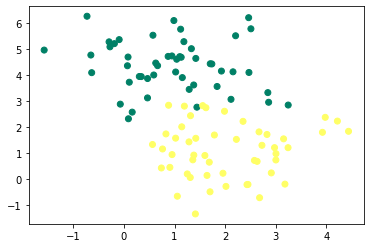

In [33]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0],1))
print(X)
print(X.shape[0])
print(X[0].shape)
print(y)
print(X.shape)
print(y.shape)
plt.scatter(X[:, 0],X[:, 1],c=y , cmap ='summer')
plt.show

In [34]:
#take a parameters X and return W,b 
def Initialisation(X):
    W = np.random.rand(X.shape[1],1)
    b = np.random.rand(1)
    return (W,b) 

In [35]:
def Model(X,W,b):
    Z = X.dot(W) + b 
    A = 1/(1+np.exp(-Z))
    return A

In [36]:
def Cost(A,y):
    return (1 / len(y)) * np.sum(-y * np.log(A) - (1-y) * np.log(1-A))                  

In [37]:
def gradients(A, X, y):
    m=len(y)
    dW= 1/m * np.dot(X.T, A-y) 
    db= 1/m * np.sum(A-y)
    return (dW,db) 
    

In [38]:
def Update(W,b,dW,db, learning_rate):
    W = W - learning_rate*dW
    b = b - learning_rate*db
    return (W,b)

In [39]:
def predict(X, W, b):
    A = Model(X, W, b)
    return A >= 0.5

In [40]:
def artificial_neuron(X, y, learning_rate=0.1 ,n_iter =100):
    W,b = Initialisation(X)
    Loss=[]
    for i in range(n_iter): 
        A = Model(X,W,b)
        Loss.append(Cost(A,y))
        dW ,db = gradients(A, X, y)
        W, b = Update(W,b,dW,db, learning_rate)
    y_pred = predict(X,W,b)
    print(accuracy_score(y,y_pred))
    plt.plot(Loss)
    plt.show()
    
    return (W, b)

0.89


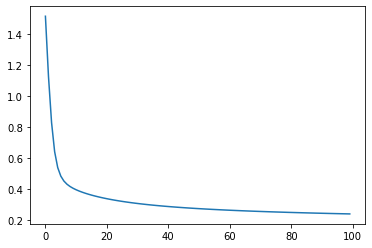

In [41]:
W, b=artificial_neuron(X, y, n_iter=100)

In [42]:
W, b

(array([[ 1.19623047],
        [-1.00864249]]),
 array([0.46906306]))

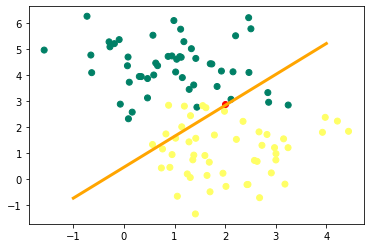

In [43]:
x0 = np.linspace(-1,4,100)
x1 = (-W[0]*x0 - b)/W[1]

new_plant = np.array([2, 2.9])
plt.scatter(X[:, 0],X[:, 1],c=y , cmap ='summer')
plt.scatter(new_plant[0], new_plant[1] , c='r' )
plt.plot(x0, x1,c='orange', lw=3)
plt.show()


In [44]:
predict(new_plant, W, b)

array([False])

In [45]:
print(W)
print(W[0])

[[ 1.19623047]
 [-1.00864249]]
[1.19623047]


In [46]:
1- 11/100

0.89